<a href="https://colab.research.google.com/github/danilsab24/Project-CV/blob/main/Hand_gesture_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hand Gesture Detection

In [1]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

dir = '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/00'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## test della tizia

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
tf.random.set_seed(3)
import glob
import skimage as oi
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU

In [ ]:
folders_names = []
##'/kaggle/input/leapgestrecog/leapGestRecog/0'
for i in range(10):
    folder = r'/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/0{}'.format(i)
    folders_names.append(folder)

files_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb']

In [ ]:
folders_names

['/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/00',
 '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/01',
 '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/02',
 '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/03',
 '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/04',
 '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/05',
 '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/06',
 '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/07',
 '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/08',
 '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/09']

In [ ]:
training_data = []

def create_training_data():
    for folder in folders_names:
        Class_num=folder[-1]
        print('Class ' ,Class_num)
        for file in files_names:
            path = os.path.join(folder, file)

            print('Class ' ,Class_num,file)
#             c=0

            for img in tqdm(os.listdir(path)):
#                 if(c==100):
#                     break
#                 c+=1
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)


                training_data.append([img_array,int(Class_num)])


create_training_data()

Class  0
Class  0 01_palm


100%|██████████| 200/200 [00:02<00:00, 85.12it/s] 


Class  0 02_l


100%|██████████| 200/200 [00:02<00:00, 93.60it/s] 


Class  0 03_fist


100%|██████████| 200/200 [00:02<00:00, 98.54it/s] 


Class  0 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 99.30it/s] 


Class  0 05_thumb


100%|██████████| 200/200 [00:02<00:00, 89.14it/s] 


Class  1
Class  1 01_palm


100%|██████████| 200/200 [00:02<00:00, 96.60it/s] 


Class  1 02_l


100%|██████████| 200/200 [00:01<00:00, 102.15it/s]


Class  1 03_fist


100%|██████████| 200/200 [00:02<00:00, 97.24it/s] 


Class  1 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 100.20it/s]


Class  1 05_thumb


100%|██████████| 200/200 [00:01<00:00, 105.17it/s]


Class  2
Class  2 01_palm


100%|██████████| 200/200 [00:02<00:00, 93.13it/s] 


Class  2 02_l


100%|██████████| 200/200 [00:02<00:00, 95.02it/s] 


Class  2 03_fist


100%|██████████| 200/200 [00:01<00:00, 104.83it/s]


Class  2 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 100.51it/s]


Class  2 05_thumb


100%|██████████| 200/200 [00:02<00:00, 99.97it/s] 


Class  3
Class  3 01_palm


100%|██████████| 200/200 [00:02<00:00, 98.87it/s] 


Class  3 02_l


100%|██████████| 200/200 [00:01<00:00, 103.23it/s]


Class  3 03_fist


100%|██████████| 200/200 [00:02<00:00, 85.26it/s] 


Class  3 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 100.73it/s]


Class  3 05_thumb


100%|██████████| 200/200 [00:01<00:00, 102.65it/s]


Class  4
Class  4 01_palm


100%|██████████| 200/200 [00:01<00:00, 100.33it/s]


Class  4 02_l


100%|██████████| 200/200 [00:02<00:00, 98.79it/s] 


Class  4 03_fist


100%|██████████| 200/200 [00:01<00:00, 105.21it/s]


Class  4 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 93.64it/s] 


Class  4 05_thumb


100%|██████████| 200/200 [00:02<00:00, 94.80it/s] 


Class  5
Class  5 01_palm


100%|██████████| 200/200 [00:01<00:00, 101.03it/s]


Class  5 02_l


100%|██████████| 200/200 [00:01<00:00, 103.83it/s]


Class  5 03_fist


100%|██████████| 200/200 [00:01<00:00, 102.05it/s]


Class  5 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 98.70it/s] 


Class  5 05_thumb


100%|██████████| 200/200 [00:02<00:00, 95.83it/s] 


Class  6
Class  6 01_palm


100%|██████████| 200/200 [00:02<00:00, 88.95it/s] 


Class  6 02_l


100%|██████████| 200/200 [00:02<00:00, 96.99it/s] 


Class  6 03_fist


100%|██████████| 200/200 [00:02<00:00, 98.51it/s] 


Class  6 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 100.79it/s]


Class  6 05_thumb


100%|██████████| 200/200 [00:01<00:00, 100.11it/s]


Class  7
Class  7 01_palm


100%|██████████| 200/200 [00:01<00:00, 100.86it/s]


Class  7 02_l


100%|██████████| 200/200 [00:02<00:00, 88.67it/s] 


Class  7 03_fist


100%|██████████| 200/200 [00:02<00:00, 96.31it/s] 


Class  7 04_fist_moved


100%|██████████| 200/200 [00:01<00:00, 102.89it/s]


Class  7 05_thumb


100%|██████████| 200/200 [00:01<00:00, 102.30it/s]


Class  8
Class  8 01_palm


100%|██████████| 200/200 [00:01<00:00, 101.31it/s]


Class  8 02_l


100%|██████████| 200/200 [00:02<00:00, 99.63it/s] 


Class  8 03_fist


100%|██████████| 200/200 [00:02<00:00, 73.79it/s]


Class  8 04_fist_moved


100%|██████████| 200/200 [00:03<00:00, 58.56it/s]


Class  8 05_thumb


100%|██████████| 207/207 [00:01<00:00, 104.76it/s]


Class  9
Class  9 01_palm


100%|██████████| 200/200 [00:01<00:00, 101.11it/s]


Class  9 02_l


100%|██████████| 200/200 [00:01<00:00, 103.03it/s]


Class  9 03_fist


100%|██████████| 200/200 [00:01<00:00, 106.69it/s]


Class  9 04_fist_moved


100%|██████████| 200/200 [00:02<00:00, 87.16it/s] 


Class  9 05_thumb


100%|██████████| 200/200 [00:02<00:00, 90.08it/s] 


In [ ]:
for folder in folders_names:
    class_num = folder[-1]
    print('Class', class_num)
    for file in files_names:
        path = os.path.join(folder, file)

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            print("Image shape:", img_array.shape,"\n")
            break  # To print only the first image shape for each file
        break  # To print only the first file shape for each folder

Class 0
Image shape: (240, 640) 

Class 1
Image shape: (240, 640) 

Class 2
Image shape: (240, 640) 

Class 3
Image shape: (240, 640) 

Class 4
Image shape: (240, 640) 

Class 5
Image shape: (240, 640) 

Class 6
Image shape: (240, 640) 

Class 7
Image shape: (240, 640) 

Class 8
Image shape: (240, 640) 

Class 9
Image shape: (240, 640) 



In [ ]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)

X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(10007, 240, 640)
(10007,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8005, 240, 640)
(8005,)
(2002, 240, 640)
(2002,)


In [ ]:
import torch
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 13 * 38, 128)  # Calculate the input size for the fully connected layer
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.relu(self.conv3(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x

In [ ]:
import torch.optim as optim  # Aggiungi questa linea per importare il modulo optim

# Converti i dati in tensore
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Crea DataLoader per il set di dati di addestramento
trainset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Instantiate the model
model = CustomCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs.unsqueeze(1))  # Aggiungi la dimensione del canale (1) mancante
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {loss:.4f}")
print(f"Training Accuracy: {accuracy*100:.2f}%")

251/251 [==============================] - 1s 4ms/step - loss: 6.2546e-10 - accuracy: 1.0000
Training Loss: 0.0000
Training Accuracy: 100.00%


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Testing Loss: {loss:.4f}")
print(f"Testing Loss : {accuracy*100:.2f} %")

63/63 [==============================] - 0s 6ms/step - loss: 0.0686 - accuracy: 0.9995
Testing Loss: 0.0686
Testing Loss : 99.95 %


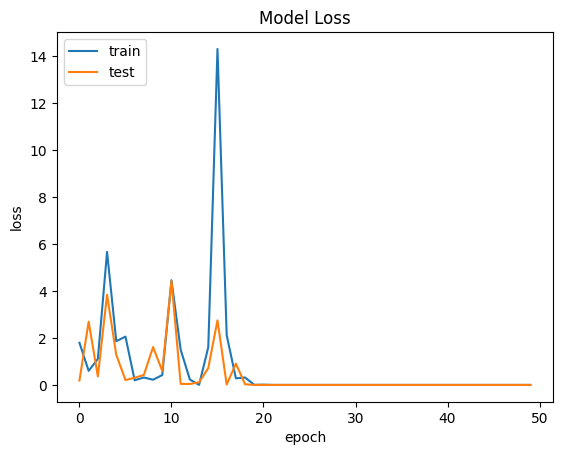

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

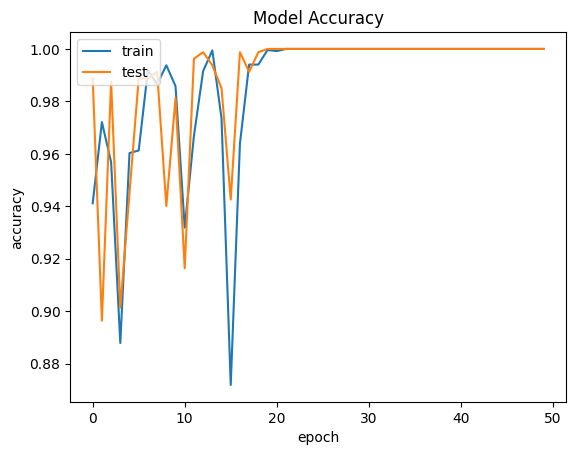

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## CNN


In [ ]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir(dir):
    if not j.startswith('.'): # If running this code locally, this is to
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '09_c': 2,
 '08_palm_moved': 3,
 '05_thumb': 4,
 '07_ok': 5,
 '06_index': 6,
 '10_down': 7,
 '03_fist': 8,
 '04_fist_moved': 9}

In [ ]:
import os

def count_elements_in_directory(directory):
    total_elements = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            total_elements += 1
    return total_elements

directory_path = '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog'
total_elements = count_elements_in_directory(directory_path)
print(f"Total elements in directory '{directory_path}': {total_elements}")


Total elements in directory '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog': 40028


In [ ]:
import os
from PIL import Image
import numpy as np

dir = '/content/drive/MyDrive/Computer Vision/dataset_hand_gesture/archive/leapGestRecog/0'

x_data = []
y_data = []
datacount = 0  # We'll use this to tally how many images are in our dataset
total_images = 40028  # Total number of images in the dataset

for i in range(0, 10):  # Loop over the ten top-level folders
    for j in os.listdir(dir + str(i) + '/'):
        if not j.startswith('.'):  # Avoid hidden folders
            count = 0  # To tally images of a given gesture
            for k in os.listdir(dir + str(i) + '/' + j + '/'):
                # Loop over the images
                img = Image.open(dir + str(i) + '/' + j + '/' + k).convert('L')
                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr)
                count += 1
                datacount += 1

                # Store the label for each image
                y_values = lookup[j]  # Store the label directly
                y_data.append(y_values)

                # Print progress
                if datacount % 1000 == 0:
                    progress = (datacount / total_images) * 100
                    print(f'Progress: {progress:.2f}%')

x_data = np.array(x_data, dtype='float32')
y_data = np.array(y_data).reshape(-1, 1)  # Reshape to be the correct size


Progress: 2.50%
Progress: 5.00%
Progress: 7.49%
Progress: 9.99%
Progress: 12.49%
Progress: 14.99%
Progress: 17.49%
Progress: 19.99%
Progress: 22.48%
Progress: 24.98%
Progress: 27.48%
Progress: 29.98%
Progress: 32.48%
Progress: 34.98%
Progress: 37.47%
Progress: 39.97%
Progress: 42.47%
Progress: 44.97%
Progress: 47.47%
Progress: 49.97%


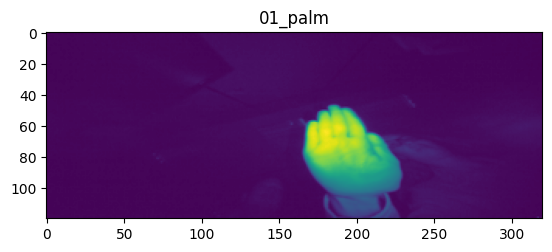

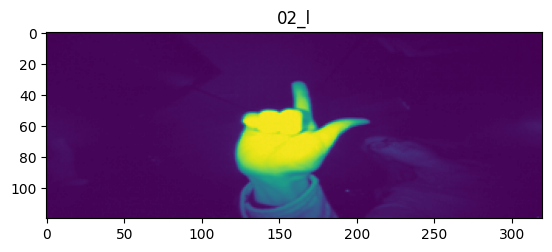

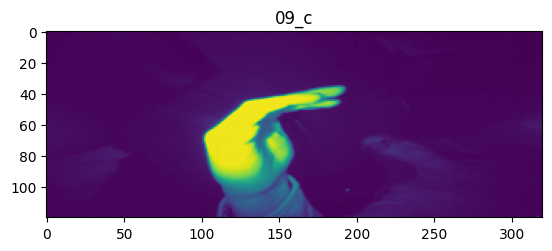

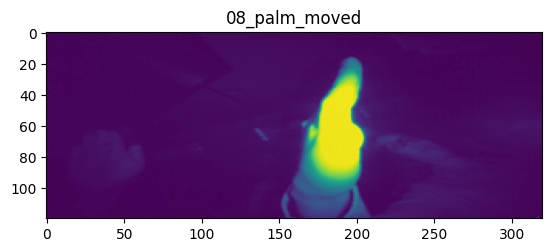

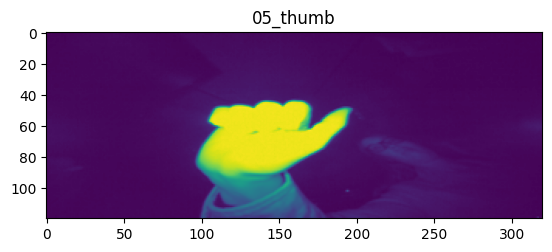

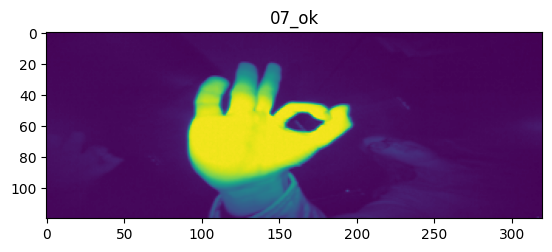

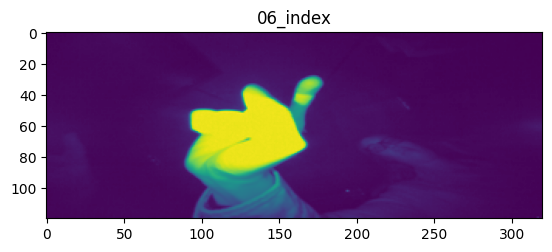

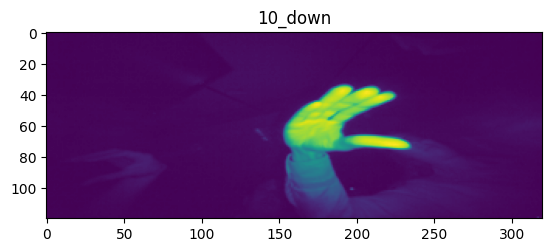

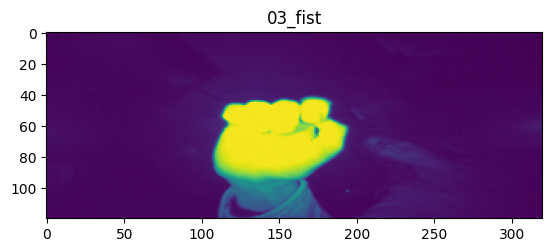

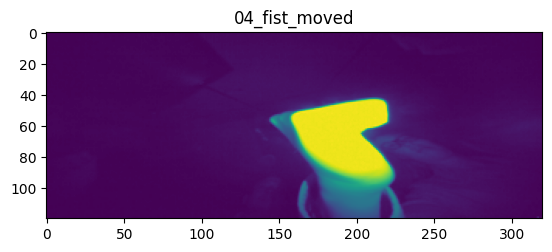

In [ ]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [ ]:
import torch
import torch.nn as nn

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 13 * 38, 128)  # Calculate the input size for the fully connected layer
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.relu(self.conv3(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=1)
        return x

model = CustomCNN()

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Convert data to PyTorch tensors
x_data_tensor = torch.tensor(x_data, dtype=torch.float32)
y_data_tensor = torch.tensor(y_data, dtype=torch.long)  # Assuming y_data contains integer labels

# Split data into train, validate, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x_data_tensor, y_data_tensor, test_size=0.2, random_state=42)
x_validate, x_test, y_validate, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
validate_dataset = TensorDataset(x_validate, y_validate)
test_dataset = TensorDataset(x_test, y_test)

# Define batch size for data loaders
batch_size = 64

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validate_loader = DataLoader(validate_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Print the sizes of train, validate, and test sets
print(f"Train set size: {len(train_dataset)}")
print(f"Validate set size: {len(validate_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Train set size: 16011
Validate set size: 2001
Test set size: 2002


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming x_train, y_train, x_validate, y_validate are PyTorch tensors or numpy arrays

# Define your model
model = CustomCNN()  # Assuming you have defined your CNN model

# Define optimizer and loss function
optimizer = optim.RMSprop(model.parameters())
criterion = nn.CrossEntropyLoss()  # Assuming your model outputs logits and not probabilities

# Convert data to PyTorch datasets
train_dataset = TensorDataset(x_train, y_train)
validate_dataset = TensorDataset(x_validate, y_validate)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validate_loader = DataLoader(validate_dataset, batch_size=64)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()  # Set model in training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    train_accuracy = 100 * correct / total

    # Validation loop
    model.eval()  # Set model in evaluation mode
    validate_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in validate_loader:
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate loss

            validate_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    validate_loss = validate_loss / len(validate_loader.dataset)
    validate_accuracy = 100 * correct / total

    # Print training/validation statistics
    print(f'Epoch {epoch+1}/{epochs}, '
          f'Train Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Validation Loss: {validate_loss:.4f}, Validation Accuracy: {validate_accuracy:.2f}%')
